In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm.notebook import trange, tqdm

from matplotlib.ticker import AutoMinorLocator


## VS Code, choisir un seul des 3 :

# Pour affichage interactif (notamment 3D) dans notebook
# %matplotlib widget

# Pour affichage interactif (notamment 3D) hors du notebook
# %matplotlib qt

# Pour affichage simple dans notebook
%config InlineBackend.figure_format = 'png'

t = time.time()

In [2]:
df = pd.read_csv('data/df_train_prepro.csv').sample(frac=1)
df

,day,hashed_partner_id,hashed_campaign_id,contextid,display_env,target_env,rtbtypeid,rtbadvisibility,rtb_detectedlanguage,urlhash2,...,hashed_uid,hashed_xd_id,valueperclick,device_type,is_display_clicked,zonecostineuro,timestamp,hour,weekday,display_size
318173,2020-10-17,b'\xa3w\x0e\x92#\xa6\xa8\x1b\xe2\xbeS\x85C\x10...,b't\xf8\x02Jvw\xef\x9e\xb9R\xf0\x1b{%\x96$\x8e...,9,web,1,7.0,0.0,10.0,6.544589e+08,...,"b'J@\xd6\x95,R\x94f\x06?\x83%\xc3\x86L\xd0\xa9...","b'J@\xd6\x95,R\x94f\x06?\x83%\xc3\x86L\xd0\xa9...",0.142117,Desktop,0,0.564199,2020-10-17 16:02:30,16,Saturday,96000
974000,2020-10-14,b'F\xb7$\xb2\xf8]O{\xd4\x85B:\x04\xbc\xf2\xcf\...,b'pM~\xcf%E\x96.\xc6i\\\xb3\x97o\xc7q4j\x9c\xd...,9,web,1,73.0,0.0,127.0,3.236788e+08,...,"b""~\x120-~\x0f\xf6'\x89\xe0}\xedX:\x0fH\x9f:\x...",b'\xe7d\xa8:\xcc_\x1e$\x83\x96b\xdd\xd3\xaa}\x...,0.143816,Android,0,1.292291,2020-10-14 06:44:10,6,Wednesday,16000
1329683,2020-10-16,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'G\x85\xe1u\x9a\x85\x158\xbdb\x91\xde2\x16\x0...,9,web,1,74.0,0.0,127.0,-1.930044e+09,...,b'\x1e\x0f\xca\xc3{a\xbbFz\x10\xf4\xa5\xb8wIz\...,b'\xfe\x94$\x81Y\x1b\xf2\x0f\x16\x18\x8f\xf2\x...,0.603344,Desktop,0,1.102753,2020-10-16 09:45:00,9,Friday,0
1576474,2020-10-14,"b""\x82\x97\xdd\xe6o+\xed\xd2'\x1f\x13;='pg\xab...","b""W\xfe\x0bI\xa5Y\x9cB\x87(|>\x84\x8d\xe7\x1d\...",6,app_android,1,4.0,1.0,16.0,-1.091776e+09,...,b'\xad\xe6K\xd7\xa0\r\xb1\x97\xeck\xe7c@\x16\x...,b'\xf4f\x9eB_\xd9\x1b\xa15\xae\xd4\xd3\xd5\x93...,0.037090,Android,0,0.138000,2020-10-14 21:52:00,21,Wednesday,16000
387801,2020-10-18,b'h\xe1\xe45\xdbj\xb4?\xd3\x8a\xe5\xdflj\x03\x...,"b'\xa3\xb7\xad@6\x80\xc3\xb5\xd2\xbc}\x02\x7f""...",9,web,1,113.0,0.0,7.0,2.122923e+09,...,b'\xa07?\x9a\xd0d=\x17A\xf6\x1a\xbbG\x0e\x0e\x...,b'\xe2M\x89\xd1*\x92\x1d\x12oZg\xd0%a\xd6\xa7\...,0.245313,Desktop,1,0.247906,2020-10-18 13:47:10,13,Sunday,96000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392233,2020-10-18,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,"b""f|g\xd5T\xc8\xe2\x90\xc6\xc8\xfeL\x0c\x15\xe...",6,app_android,1,73.0,0.0,127.0,NaN,...,b'^\xa4Z\xa7%\x8b\n_j\x8dj\xb1\xfb\xb7v4\xe8\x...,"b""F\xb0\xdf\xad\x88R\xe9\xba\\\x08\x87z\xbf\\\...",0.521959,Android,0,0.430140,2020-10-18 12:04:20,12,Sunday,75000
940220,2020-10-14,b'FH!\x9f4\x0bW%;\xf4\x85\xe3\x15J\xd8\x96\xea...,b'\xa9j\x02\xbbyy\x98\xfb\xc7\xaf\x06L#\x8d\x9...,6,web,1,73.0,1.0,127.0,-1.180163e+09,...,b'b\\\n{\x94\x9c\xc7\xe4\xa7\xb9j\xd6p\x94\xab...,b'\xfdJt2\xcet4\xd2\xc9\x9d\xe7\xd8R\x12\x10Y<...,0.249622,iPhone,0,0.951604,2020-10-14 18:46:50,18,Wednesday,180000
241359,2020-10-18,b'\x0f\xbc\x909\x14[dI\xa7v]\xcc\x00\xd3\xbd\x...,b'\xa0\t^\xa5Z\x06[-\x86\x13\xd8\x08\x98\x8de\...,9,app_ios,2,69.0,0.0,16.0,1.862823e+09,...,b'\x07\x90G\x8d\xf3\xc7\xff\xc5t\xc0\xc3\x1ci\...,"b""\x00R=\x16\xd1\xc9\xa3\xa8\xd9?j\xdb#\xb9kVF...",0.136832,iPhone,0,4.789185,2020-10-18 16:19:30,16,Sunday,153600
1421238,2020-10-13,b'\x0f\xbc\x909\x14[dI\xa7v]\xcc\x00\xd3\xbd\x...,b'K[\xda\t\xe8\xc2@5\xaf~\x08AVE&jK\xf9v\xfft4...,9,web,1,4.0,2.0,16.0,1.572133e+09,...,"b'?\xcfL\xcf\xeb,\x13\xcf\xc4=\xe5\xea\xc1&.\x...",b'\x14*[@\x0c\xf6\xfb\x83[\x93\xcf]sS\x1b\xb6\...,0.116769,Desktop,0,0.119000,2020-10-13 20:01:40,20,Tuesday,180000


In [3]:
df.dtypes

day                                                object
hashed_partner_id                                  object
hashed_campaign_id                                 object
contextid                                           int64
display_env                                        object
target_env                                          int64
rtbtypeid                                         float64
rtbadvisibility                                   float64
rtb_detectedlanguage                              float64
urlhash2                                          float64
urlhash3                                          float64
urlhash4                                          float64
user_country                                       object
hashed_affiliateid                                 object
hashed_app_id                                      object
googleviewability                                 float64
googlepagevertical                                float64
campaignscenar

# Corrélations

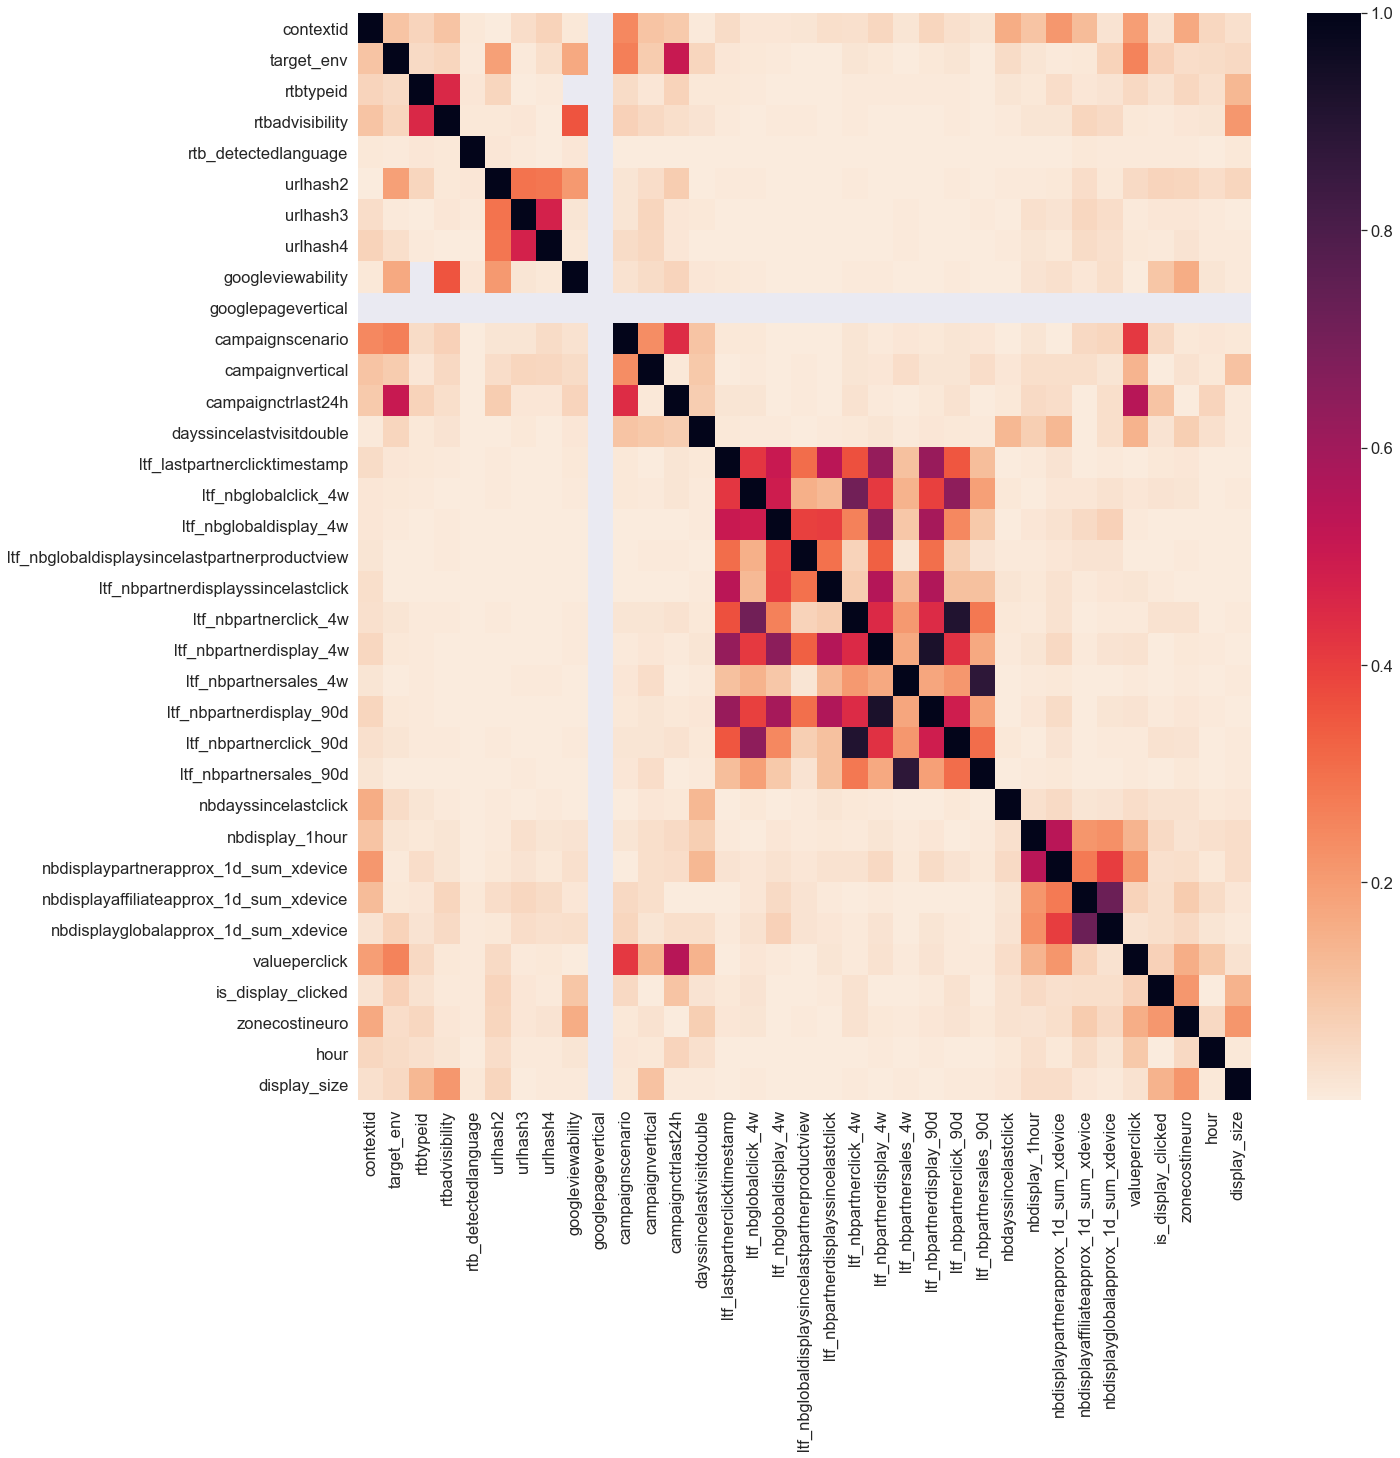

In [4]:
fig = plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
corrMatrix = df.corr()
corrMatrix = np.abs(corrMatrix)
sns.heatmap(corrMatrix, cmap="rocket_r", annot=False)
plt.show()

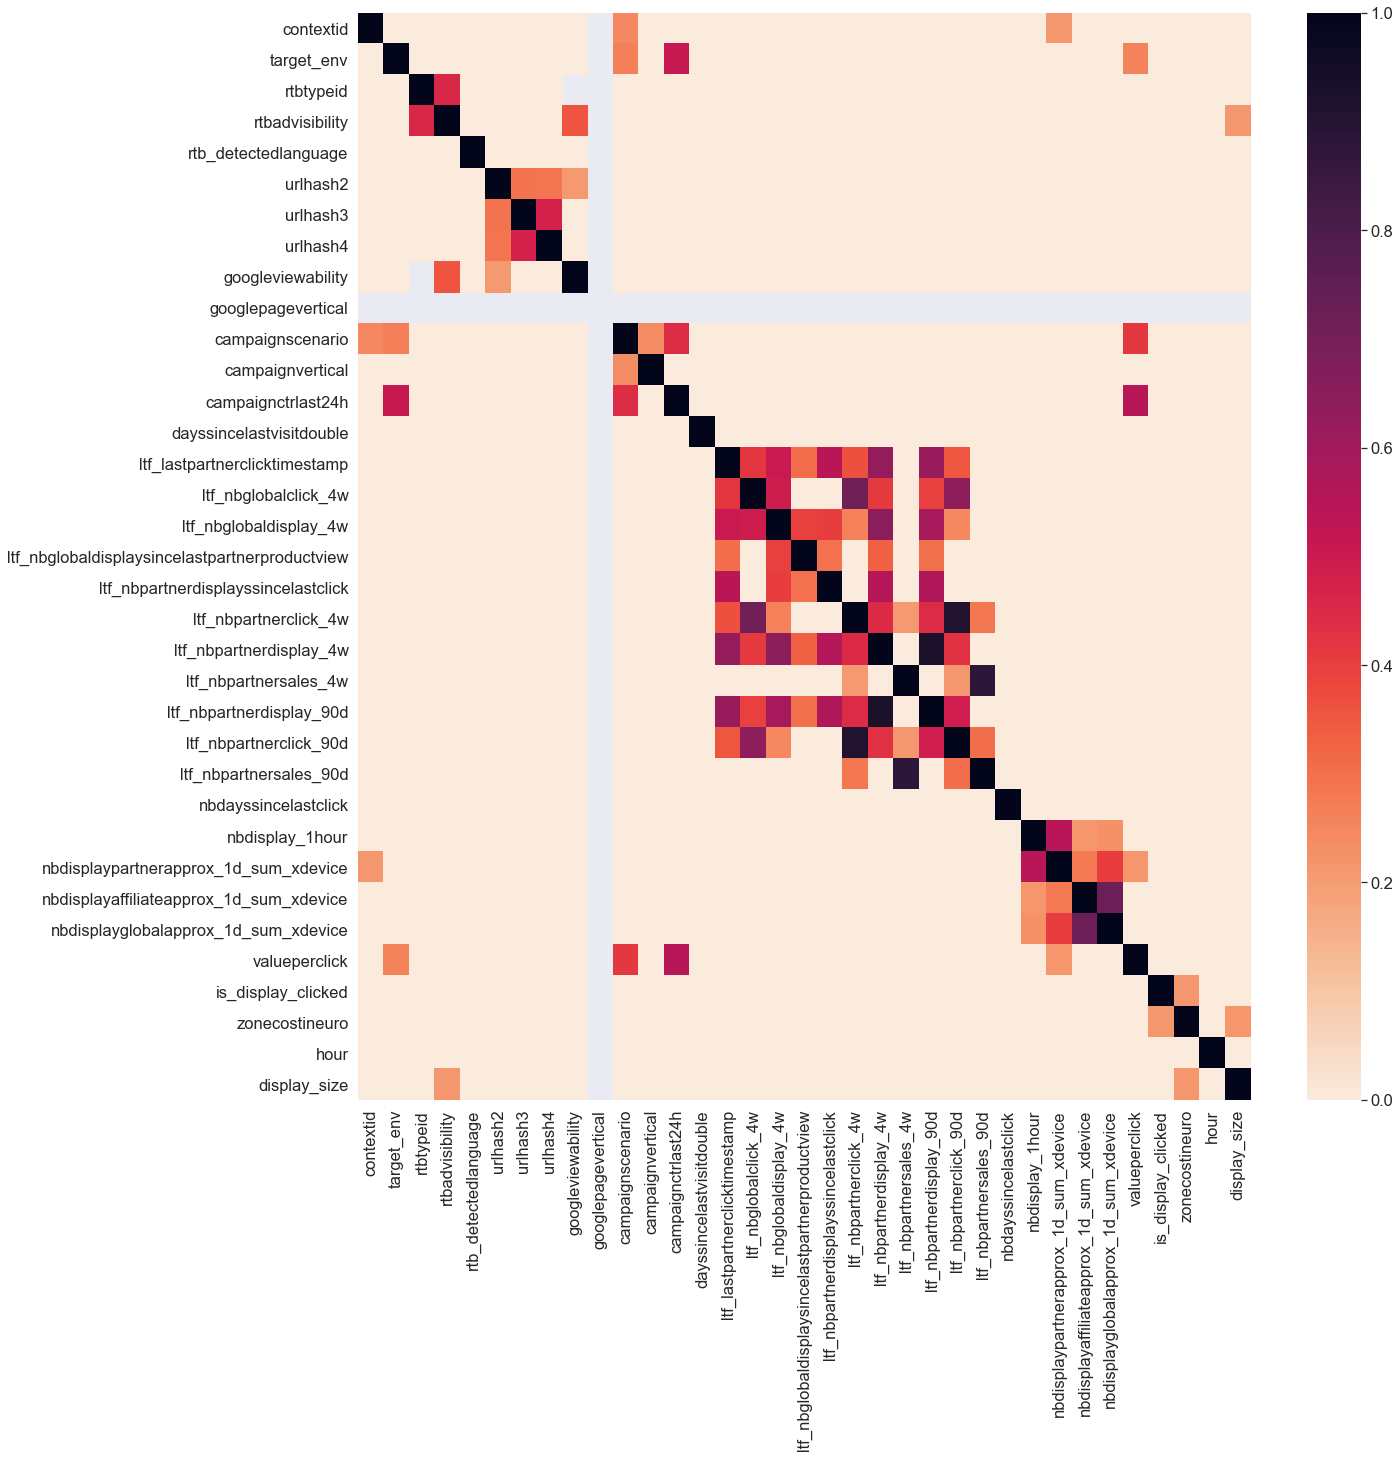

In [5]:
fig = plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
corrMatrix = corrMatrix.applymap(lambda x : 0 if x <= 0.2 else x)
sns.heatmap(corrMatrix, cmap="rocket_r", annot=False)
plt.show()

# Pourcentages de clics selon les modalités de plusieurs variables explicatives

In [6]:
def to_discrete(serie, n=10):
    """
    Renvoie un objet Series contenant une version discrète de la variable
    numérique 'variable' dans le data frame df.
    Cette variable discrète est constituée de dix catégories croissantes.
    """
    discrete_var = np.zeros(len(serie), int)
    var_min = serie.min()
    var_max = serie.max()
    pas = (var_max - var_min)/n
    for i in trange(len(serie)):
        j = -1
        while serie.iloc[i] >= var_min + (j+1)*pas:
            j += 1
        if j == n:
            j = n-1
        discrete_var[i] = j
    return discrete_var

In [7]:
def to_discrete_mean(serie, n=10):
    """
    Renvoie un objet Series contenant une version discrète de la variable
    numérique 'variable' dans le data frame df.
    Cette variable discrète est constituée de dix catégories croissantes.
    """
    discrete_var = np.zeros(len(serie))
    var_min = serie.min()
    var_max = serie.max()
    pas = (var_max - var_min)/n
    for i in trange(len(serie)):
        j = -1
        while serie.iloc[i] >= var_min + (j+1)*pas:
            j += 1
        if j == n:
            j = n-1
        discrete_var[i] = var_min + (j+0.5)*pas
    return discrete_var

In [8]:
def ratio_plot(variable, zoom=False):
    """
    Trace le pourcentage de clics selon la variable 'variable' dans df.
    """
    clicked = df[df['is_display_clicked'] == 1].groupby(variable).count()['is_display_clicked']
    notclicked = df[df['is_display_clicked'] == 0].groupby(variable).count()['is_display_clicked']
    ratio = clicked / (clicked + notclicked)
    
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(8, 6))
    ratio.plot(ax=ax, marker='o')
    plt.xticks(rotation=0)
    
    if not zoom:
        y_min, y_max = ax.get_ylim()
        y_min = 0
        ax.set_ylim(y_min, y_max)
    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(which='major')
    ax.grid(b=True, which='minor', axis='y', linestyle='--', alpha=0.2)
    
    ax.set_title(f"Pourcentage de clics en fonction de {variable}")
    ax.set_xlabel(f"{variable}")
    ax.set_ylabel('Nb de clics/ (nb de clics + nb de non clics)') 

    plt.show()
    plt.style.use('default')

In [9]:
def stacked_barplot(column):
    clicked = df[df['is_display_clicked'] == 1].groupby(column).count()['is_display_clicked']
    notclicked = df[df['is_display_clicked'] == 0].groupby(column).count()['is_display_clicked']
    total = df.groupby('contextid').count()['is_display_clicked']
    clicked = clicked / total * 100
    notclicked = notclicked / total * 100

    r = list(range(len(clicked)))

    # plot
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(8, 6))
    barWidth = 0.85
    names = clicked.index
    # Create orange Bars
    ax.bar(r, list(notclicked), color='#f9bc86', edgecolor='white', width=barWidth, label="no click")
    # # Create blue Bars
    ax.bar(r, list(clicked), bottom=list(notclicked), color='#a3acff',
        edgecolor='white', width=barWidth, label='click')
    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(which='major', axis='y')
    ax.grid(b=True, which='minor', axis='y', linestyle='--', alpha=0.2)

    plt.legend()
    # Custom x axis
    plt.xticks(r, names)
    plt.xlabel(column)
    plt.ylabel('Répartition des clics')

    # Show graphic
    plt.show()
    plt.style.use('default')

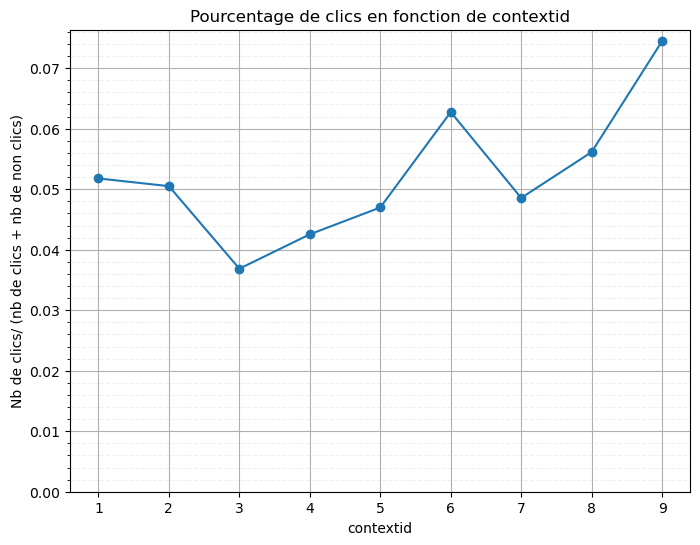

In [10]:
ratio_plot("contextid")

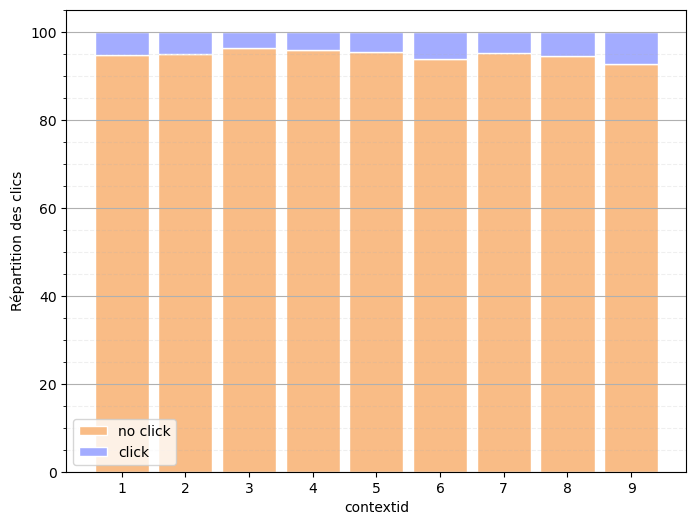

In [11]:
stacked_barplot('contextid')

  0%|          | 0/1610494 [00:00<?, ?it/s]

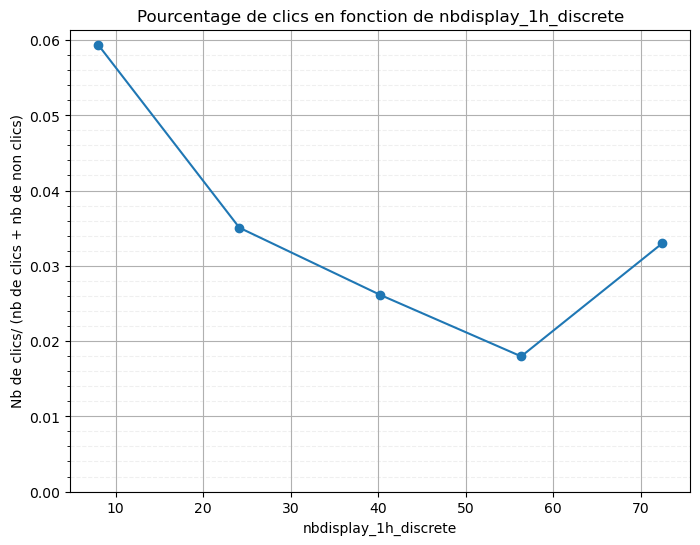

Wall time: 36.3 s


In [12]:
%%time
df["nbdisplay_1h_discrete"] = to_discrete_mean(df["nbdisplay_1hour"])
ratio_plot("nbdisplay_1h_discrete")

  0%|          | 0/1610494 [00:00<?, ?it/s]

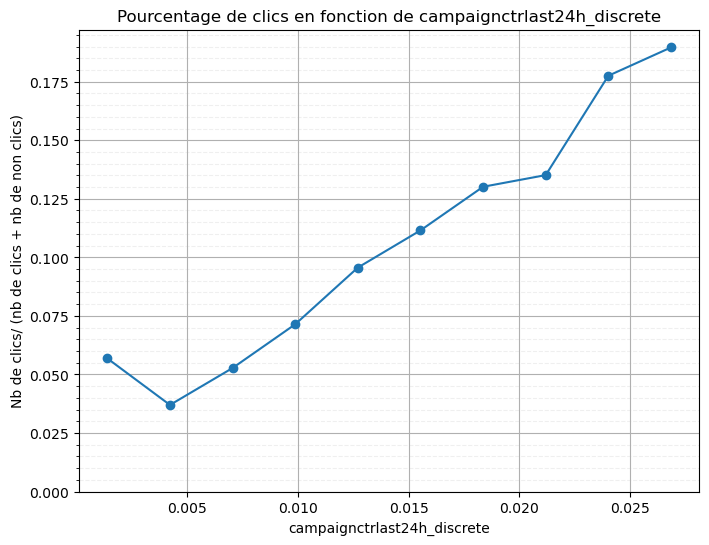

Wall time: 48.6 s


In [13]:
%%time
df["campaignctrlast24h_discrete"] = to_discrete_mean(df["campaignctrlast24h"])
ratio_plot("campaignctrlast24h_discrete")

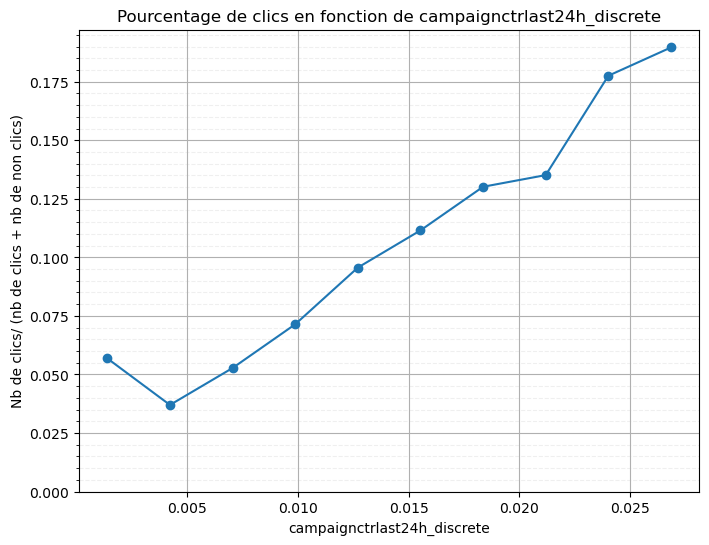

In [14]:
ratio_plot("campaignctrlast24h_discrete")

  0%|          | 0/1610494 [00:00<?, ?it/s]

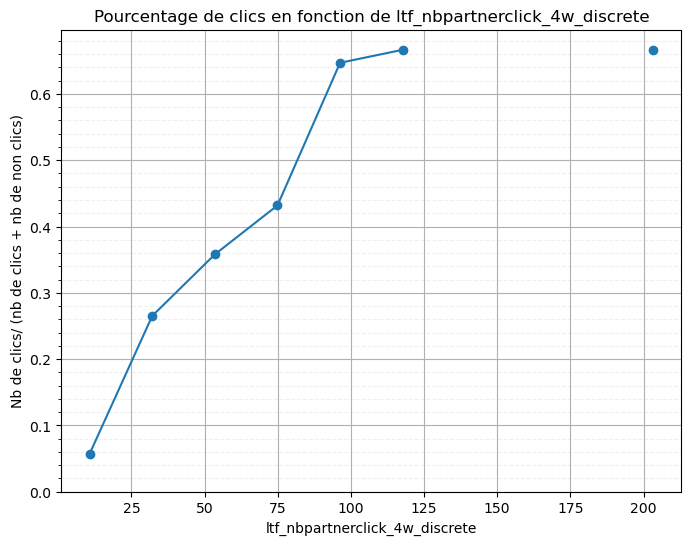

In [15]:
df["ltf_nbpartnerclick_4w_discrete"] = to_discrete_mean(df["ltf_nbpartnerclick_4w"])
ratio_plot("ltf_nbpartnerclick_4w_discrete")

  0%|          | 0/1610494 [00:00<?, ?it/s]

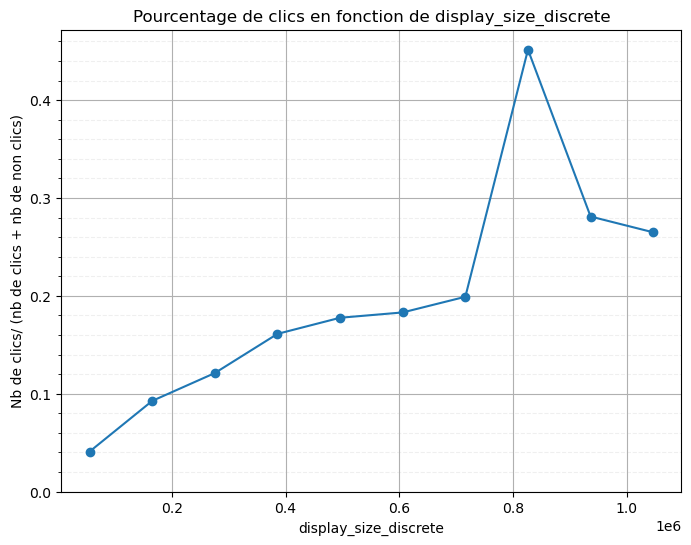

In [16]:
df["display_size_discrete"] = to_discrete_mean(df["display_size"])
ratio_plot("display_size_discrete")

In [17]:
d = df[['is_display_clicked', 'hashed_uid', 'contextid']].groupby(['hashed_uid']).sum()
d.sort_values('is_display_clicked', ascending=False, inplace=True)
d['user_apperances'] = df['hashed_uid'].value_counts()
d['contextid_weighted'] = d['contextid'] / d['user_apperances']

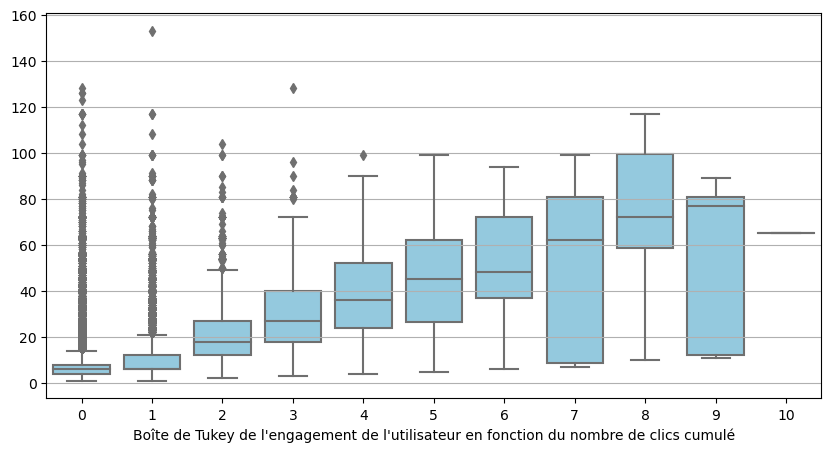

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
plt.style.use('default')
sns.boxplot(x="is_display_clicked", y="contextid", data=d, ax=ax, color="skyblue")
ax.set_xlabel("Boîte de Tukey de l'engagement de l'utilisateur en fonction du nombre de clics cumulé")
ax.set_ylabel('')
ax.grid(axis='y')
plt.show()
plt.style.use('default')

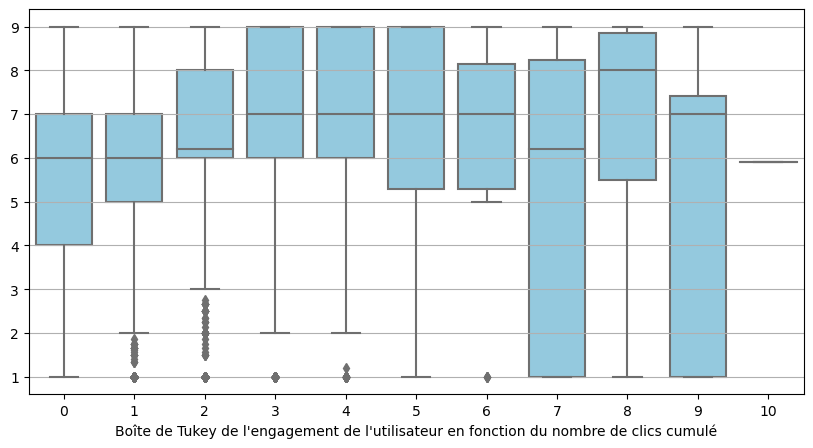

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
plt.style.use('default')
sns.boxplot(x="is_display_clicked", y="contextid_weighted", data=d, ax=ax, color="skyblue")
ax.set_xlabel("Boîte de Tukey de l'engagement de l'utilisateur en fonction du nombre de clics cumulé")
ax.set_ylabel('')
ax.grid(axis='y')
plt.show()
plt.style.use('default')

# Bots

Calcul du nombre de clics par utilisateurs

In [20]:
a = df[['is_display_clicked', 'hashed_uid']].groupby(['hashed_uid']).sum()
a.sort_values('is_display_clicked', ascending=False)

,is_display_clicked
hashed_uid,
b'\x187\xb3\x93\x8cy\xd0MSG?\xd7\xd9\xbav?8$#(-*x\xd1\x1c\xed\x18\xa8\xd8y\x8b\xf1',10
b'#\x0b\xd7*\xa1\xae\x8fLT\xe1[W\x9f\xaf^-1\xfd~\x0f\x0ca\xf7+\x80?)_w\xdd\x9bR',9
b'vp\xd9\xed/\xa1b\xc31\x99FO\x0e\xd9{27\xf1\x8b\x19[`\xba2\xc2\xc8\xb0y\x1f\xb8c\xd0',9
b'\x13\x88\x8d\xd3h\xd9\xa1f\xd3\xea\x1e\x8d\xb7Dn\xa2\x0c>\xea\xf5n\xd3\xb1\xcbJ\x10\x06\x19\xde\x04J\xf9',9
b'>\x90\xdd\x05s\xf2\x8a\x1dv\xc8Kdy\xbc\xd9\xe7a+\xf6\x04G2\xed\x1eT\xe6\xaeS\x81L$\x9c',9
...,...
"b'\x05\xb2R\x0b\xca\xb8c\x9c8\xd9\xbas\x99\xc7j\xf3\xbeEgR\xe4\xfe\xaa\xe6,\x14\xb6\x15 \x1f\xbf\xcf'",0
b'\x05\xb2[\x88\x06\x81!q\xe8<XKL\t\xcb\x04\xbb\xcd\xd9\xab\xb4\xc3UA\xb3UR\xaa~z}\xfa',0
b'\x05\xb2\n\xa3\x95\xb22\xc9\xec\xf8\xc4\rn\xb7\\\x1dx\xc5\x10\x9a_p\x8e6l\xf3Oc!J]H',0


In [21]:
# `hashed_uid` : Hashed identification number of the Web user
d = df[['is_display_clicked', 'hashed_uid', 'contextid']].groupby(['hashed_uid']).sum()
d.sort_values('is_display_clicked', ascending=False, inplace=True)
d['user_apperances'] = df['hashed_uid'].value_counts()
d['contextid_weighted'] = d['contextid'] / d['user_apperances']
d

,is_display_clicked,contextid,user_apperances,contextid_weighted
hashed_uid,,,,
b'\x187\xb3\x93\x8cy\xd0MSG?\xd7\xd9\xbav?8$#(-*x\xd1\x1c\xed\x18\xa8\xd8y\x8b\xf1',10,65,11,5.909091
b'#\x0b\xd7*\xa1\xae\x8fLT\xe1[W\x9f\xaf^-1\xfd~\x0f\x0ca\xf7+\x80?)_w\xdd\x9bR',9,77,11,7.000000
b'vp\xd9\xed/\xa1b\xc31\x99FO\x0e\xd9{27\xf1\x8b\x19[`\xba2\xc2\xc8\xb0y\x1f\xb8c\xd0',9,81,9,9.000000
b'\x13\x88\x8d\xd3h\xd9\xa1f\xd3\xea\x1e\x8d\xb7Dn\xa2\x0c>\xea\xf5n\xd3\xb1\xcbJ\x10\x06\x19\xde\x04J\xf9',9,11,11,1.000000
b'>\x90\xdd\x05s\xf2\x8a\x1dv\xc8Kdy\xbc\xd9\xe7a+\xf6\x04G2\xed\x1eT\xe6\xaeS\x81L$\x9c',9,12,12,1.000000
...,...,...,...,...
"b'\x05\xb2R\x0b\xca\xb8c\x9c8\xd9\xbas\x99\xc7j\xf3\xbeEgR\xe4\xfe\xaa\xe6,\x14\xb6\x15 \x1f\xbf\xcf'",0,8,1,8.000000
b'\x05\xb2[\x88\x06\x81!q\xe8<XKL\t\xcb\x04\xbb\xcd\xd9\xab\xb4\xc3UA\xb3UR\xaa~z}\xfa',0,8,1,8.000000
b'\x05\xb2\n\xa3\x95\xb22\xc9\xec\xf8\xc4\rn\xb7\\\x1dx\xc5\x10\x9a_p\x8e6l\xf3Oc!J]H',0,16,2,8.000000


In [22]:
# `hashed_xd_id` : Hashed cross device identification number 
b = df[['is_display_clicked', 'hashed_xd_id']].groupby(['hashed_xd_id']).sum()
b.sort_values('is_display_clicked', ascending=False)

,is_display_clicked
hashed_xd_id,
b'\x97\x9d)\xb3*\x8e\xf6\xeer\xf7\x166a\x12\xcc\xa5\xf4\x90\xc9\xd9\x197\xd1\xdf\x17f\x10%\xfe\x99\xe4\xb1',10
"b""L\xf5H\x97\x10\xfd\x7f~\x1a9\xa3?\xac\xfdNf\xf6\\\x8f13\xc1\xcc\xf8\xbf\xc9q\x87'\xbc]H""",10
b'\xc4\xc8\xb7\xb0\x7faU\x01D5\xfe\x96\xb7\x165\xff\x90\xc2\xcd;\xbf^\\\x10\xf9z*\x0e\xc6%4v',9
b'\xadk\x10\x99k\\\x7f\xef\xf3\x86\xe6f\\{)\xd8\x14t\x8b\x8b\x16\x7f\xb0z)\xd4\n\xe7&dN\xe9',9
b'>\x90\xdd\x05s\xf2\x8a\x1dv\xc8Kdy\xbc\xd9\xe7a+\xf6\x04G2\xed\x1eT\xe6\xaeS\x81L$\x9c',9
...,...
b'\x05\xa3\x85\xf7TeZ\x98\xcc&\x15\xdc\xbaY\x85\xe8\xf3\xce\xd2I\xc8R:;-\x1f\xb9\xb9\x9e\xef\x89\x95',0
"b'\x05\xa3\x99\xafx4\x96,G\xca\x03I\x97C|\xe7~\xad\x1d\x80M\x96[\xf0\xbd\x886\x96\x1c\xb8\x9c\xa9'",0
b'\x05\xa3\xaa?\xa0W\xf5\xc2\xf4\xcev~X\xe6\xfc\xb3%\xc8?;T\xff\xc1\x02\xf5\\k\xcb2N[\n',0


## Répartition du nombre de clics

Text(0.5, 1.0, 'hashed_uid')

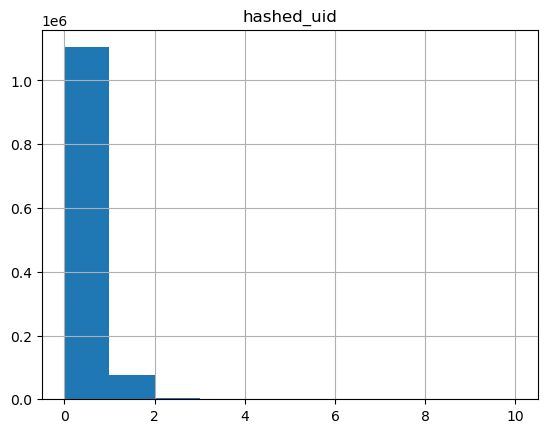

In [23]:
a[(a.is_display_clicked < 20)].hist()
plt.title("hashed_uid")

Text(0.5, 1.0, 'hashed_uid')

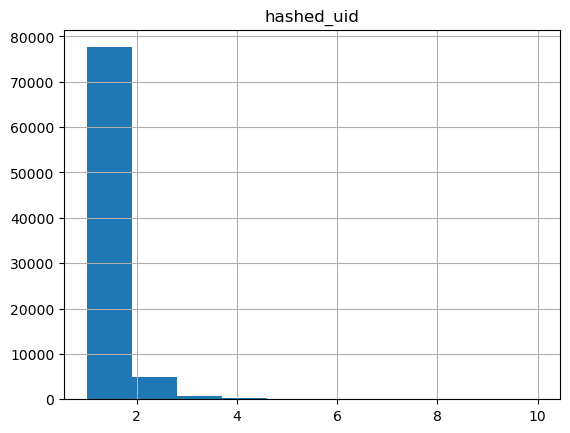

In [24]:
a[(a.is_display_clicked > 0) & (a.is_display_clicked < 20)].hist()
plt.title("hashed_uid")

Text(0.5, 1.0, 'hashed_xd_id')

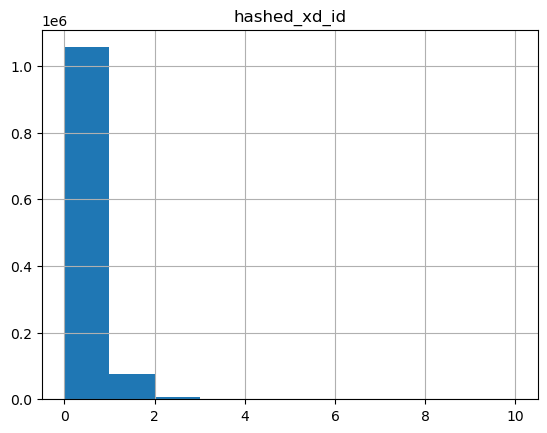

In [25]:
b[(b.is_display_clicked < 20)].hist()
plt.title("hashed_xd_id")

Text(0.5, 1.0, 'hashed_xd_id')

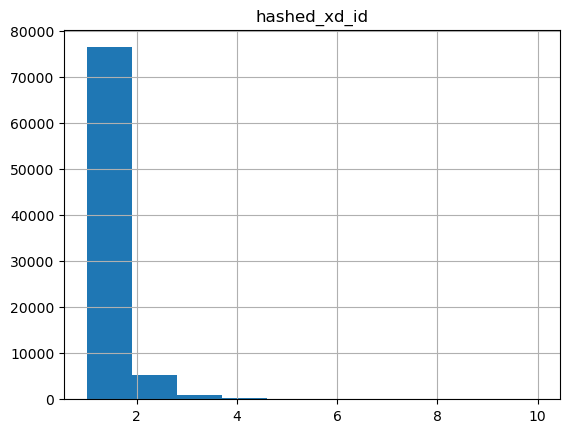

In [26]:
b[(b.is_display_clicked > 0) & (b.is_display_clicked < 20)].hist()
plt.title("hashed_xd_id")

## Valeurs nan dans les clics

Proportion des valeurs nan pour chaque variable parmi les publicités cliquées

In [27]:
c = df.loc[df['is_display_clicked']==1]
c.isnull().sum(axis = 0)/len(c)

day                                               0.000000
hashed_partner_id                                 0.000000
hashed_campaign_id                                0.000000
contextid                                         0.000000
display_env                                       0.000000
target_env                                        0.000000
rtbtypeid                                         0.002975
rtbadvisibility                                   0.002975
rtb_detectedlanguage                              0.002975
urlhash2                                          0.094472
urlhash3                                          0.094472
urlhash4                                          0.094472
user_country                                      0.000174
hashed_affiliateid                                0.000000
hashed_app_id                                     0.324941
googleviewability                                 0.618809
googlepagevertical                                0.0029

## Timestamp

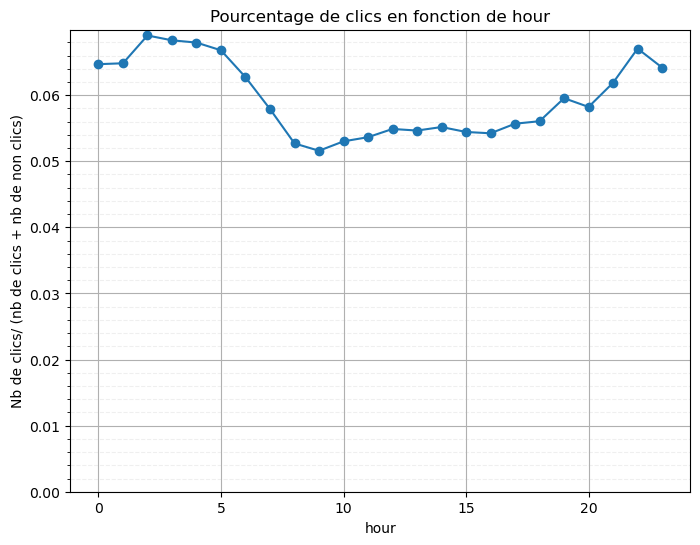

In [28]:
ratio_plot("hour")

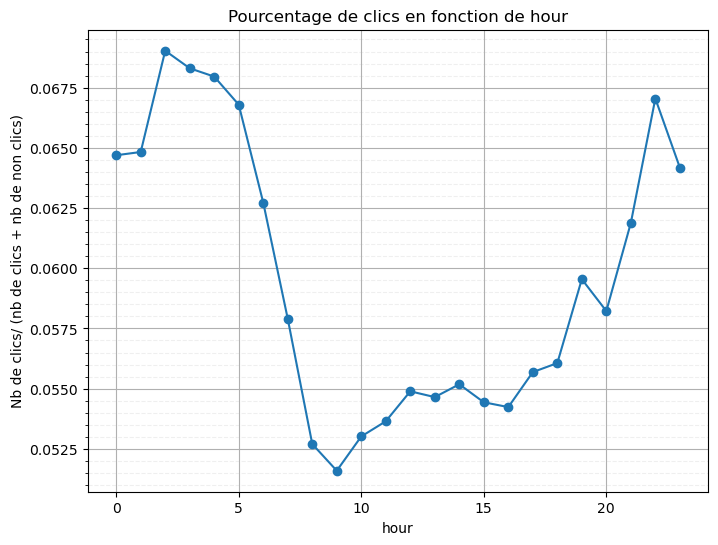

In [29]:
ratio_plot("hour", zoom=True)

In [30]:
df.head()

,day,hashed_partner_id,hashed_campaign_id,contextid,display_env,target_env,rtbtypeid,rtbadvisibility,rtb_detectedlanguage,urlhash2,...,is_display_clicked,zonecostineuro,timestamp,hour,weekday,display_size,nbdisplay_1h_discrete,campaignctrlast24h_discrete,ltf_nbpartnerclick_4w_discrete,display_size_discrete
318173,2020-10-17,b'\xa3w\x0e\x92#\xa6\xa8\x1b\xe2\xbeS\x85C\x10...,b't\xf8\x02Jvw\xef\x9e\xb9R\xf0\x1b{%\x96$\x8e...,9,web,1,7.0,0.0,10.0,6.544589e+08,...,0,0.564199,2020-10-17 16:02:30,16,Saturday,96000,8.05,0.012711,10.7,55080.0
974000,2020-10-14,b'F\xb7$\xb2\xf8]O{\xd4\x85B:\x04\xbc\xf2\xcf\...,b'pM~\xcf%E\x96.\xc6i\\\xb3\x97o\xc7q4j\x9c\xd...,9,web,1,73.0,0.0,127.0,3.236788e+08,...,0,1.292291,2020-10-14 06:44:10,6,Wednesday,16000,8.05,0.007061,10.7,55080.0
1329683,2020-10-16,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'G\x85\xe1u\x9a\x85\x158\xbdb\x91\xde2\x16\x0...,9,web,1,74.0,0.0,127.0,-1.930044e+09,...,0,1.102753,2020-10-16 09:45:00,9,Friday,0,8.05,0.004237,10.7,55080.0
1576474,2020-10-14,"b""\x82\x97\xdd\xe6o+\xed\xd2'\x1f\x13;='pg\xab...","b""W\xfe\x0bI\xa5Y\x9cB\x87(|>\x84\x8d\xe7\x1d\...",6,app_android,1,4.0,1.0,16.0,-1.091776e+09,...,0,0.138000,2020-10-14 21:52:00,21,Wednesday,16000,8.05,0.001412,10.7,55080.0
387801,2020-10-18,b'h\xe1\xe45\xdbj\xb4?\xd3\x8a\xe5\xdflj\x03\x...,"b'\xa3\xb7\xad@6\x80\xc3\xb5\xd2\xbc}\x02\x7f""...",9,web,1,113.0,0.0,7.0,2.122923e+09,...,1,0.247906,2020-10-18 13:47:10,13,Sunday,96000,8.05,0.009886,10.7,55080.0


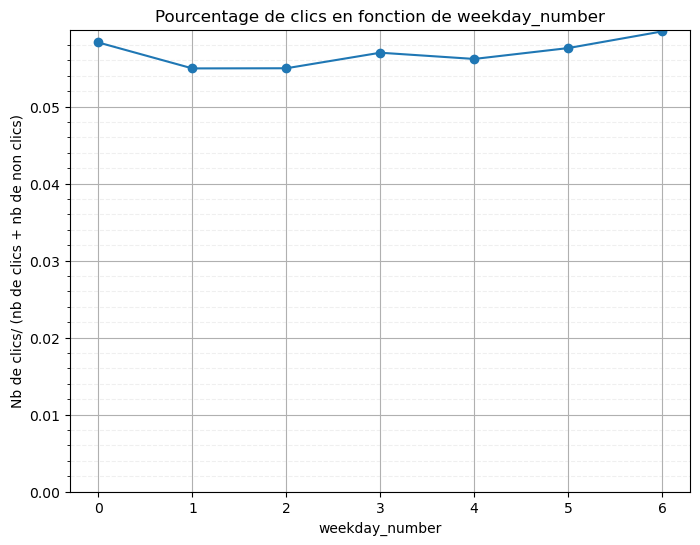

In [31]:
df['weekday_number'] = pd.to_datetime(df.timestamp).dt.weekday
ratio_plot("weekday_number")

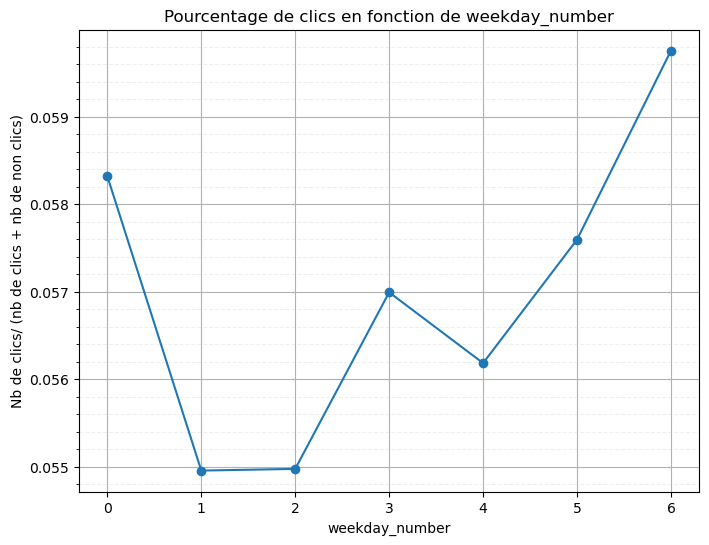

In [32]:
ratio_plot("weekday_number", zoom=True)

In [33]:
print(f"Temps d'exécution total : {time.strftime('%H:%M:%S', time.gmtime(time.time()-t))}")

Temps d'exécution total : 00:04:12
